In [1]:
# Plot PKR functional score curves with standard devaition (gray) and standard error (black) bars
# Supplemental Figure 7

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# figure save directory
save_dir = "../../results/figures/score-curves"
os.makedirs(save_dir, exist_ok=True)

In [3]:
input_file = '../../results/barseq/pkr-variant-reads_240228.csv'

df = pd.read_csv(input_file)

def pkr_type(x, pkr_stop = 551):
    if x[-1] == "*" and int(x.split('-')[1][1:-1]) < pkr_stop:
        return "Nonsense"
    elif x[-2:] == 'WT':
        return "WT"
    else:
        return 'Variant'
df['pkr_type'] = df['pkr'].apply(pkr_type)

color_dict = {'Region 1':'#F0B142', 'Region 2':'#E06B37','Region 3':'#C9397D','Region 4':'#722758'}
df['region_color'] = df['pkr_regions'].map(color_dict)

/tmp/ipykernel_2179532/1167746176.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.query('pkr_type == "Variant"', inplace=True)
/tmp/ipykernel_2179532/1167746176.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.sort_values(by=['auc_mean'], ascending=False, inplace=True)


Scatter Plot with Standard Deviation Bars


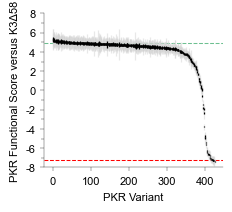

Scatter Plot with Standard Deviation Bars


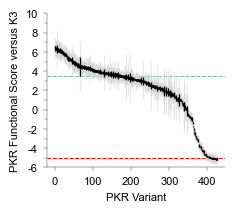

Scatter Plot with Standard Deviation Bars


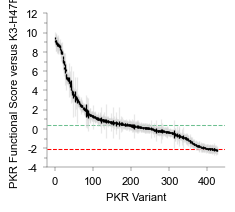

In [4]:
# wide plots with std and se
# NEED TO REDO SORT ORDER AFTER REMOVING WT AND NONSENSE VARIANTS
for k3, k3_name in zip(['K3L-Null','K3L-WT','K3L-H47R'],["K3Δ58","K3","K3-H47R"]):
    # plot parameters
    width_in = 2.3 #8.8
    height_in = 2
    font_size = 8
    font = 'Arial'
    stroke = .25
    tick_len = 3
    alpha_val = .2
    marker_diameter = 3 # 3
    #ymin = -5
    #ymax=5.9

    font = {'family': font, 'size': font_size}
    plt.rc('font', **font)
    plt.rc('lines', linewidth=stroke)
    plt.figure(figsize=(width_in, height_in)) # save size

    temp_df = df.query('k3 == @k3')

    hline_wt = temp_df.query('pkr == "PKR-WT"')['auc_mean'].values[0]
    hline_non = temp_df.query('pkr_type == "Nonsense"')['auc_mean'].values[0]

    temp_df.query('pkr_type == "Variant"', inplace=True)
    temp_df.sort_values(by=['auc_mean'], ascending=False, inplace=True)
    #temp_df.sort_values(by=, ascending=True, inplace=True)
    temp_df.reset_index(drop=True, inplace=True)
    
    # Plot elements
    for i, row in temp_df.query('pkr_type == "Variant"').iterrows():
        #plt.errorbar(i, row['auc_mean'], yerr=row['auc_std'], fmt='-', color='gray', capsize=0, alpha=0.5, zorder=1)
        plt.errorbar(i, row['auc_mean'], yerr=row['auc_std'], fmt='-', color='lightgray', capsize=0, zorder=1, alpha=.5, elinewidth=.9)
        #plt.errorbar(i, row['auc_mean'], yerr=row['auc_sem'], fmt='-', color='black', capsize=0, alpha=1, zorder=2)
        plt.errorbar(i, row['auc_mean'], yerr=row['auc_sem'], fmt='-', c='black', capsize=0, zorder=2, elinewidth=.9)
        #plt.scatter(i,row['auc_mean'], c=row['region_color'], alpha=1, zorder=3, s=2)
    
    # y tick limits
    if k3 == "K3L-Null":
        plt.ylim(-8, 8)
    elif k3 == "K3L-WT":
        plt.ylim(-6, 10)
    elif k3 == "K3L-H47R":
        plt.ylim(-4, 12)

    # modify plot spines
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(stroke)
    ax.spines['bottom'].set_linewidth(stroke)

    # Set major ticks at even numbers and label as integers
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))

    # Show minor ticks for every integer
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
    
    # Set major tick length
    ax.tick_params(axis='both', direction='out', length=tick_len, width=stroke)
    plt.gca().yaxis.set_tick_params(width=stroke, which='both', direction='out')

    # pkr wt
    plt.axhline(y=hline_wt, color='#6dc091', linestyle='--', linewidth=.75, zorder=0)

    # pkr nonsense  
    plt.axhline(y=hline_non, color='red', linestyle='--', linewidth=.75, zorder=0)
    
    # Add labels and title
    plt.xlabel('PKR Variant')
    plt.ylabel(f'PKR Functional Score versus {k3_name}')
    print(f'Scatter Plot with Standard Deviation Bars')
    
    # Show plot
    plt.show()

    fig = ax.get_figure()

    # save plot
    plot_name = f'{k3_name}_wide_stdev_stder_revised.svg'
    output_file = os.path.join(save_dir, plot_name)
    fig.savefig(output_file, bbox_inches='tight', format='svg', transparent=True)